In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from yahoofinancials import YahooFinancials

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498752,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327446,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702919,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676117,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095558,144114400


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498752,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [5]:
df=df.drop(['Date', 'Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


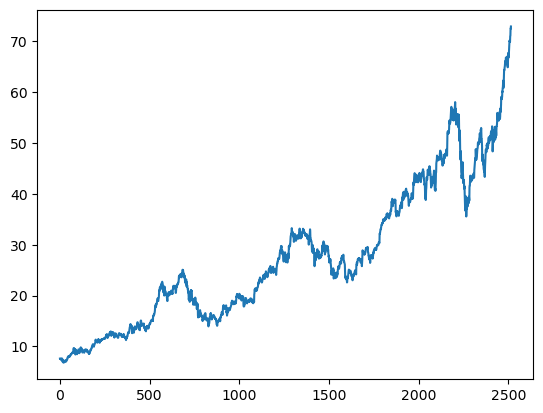

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

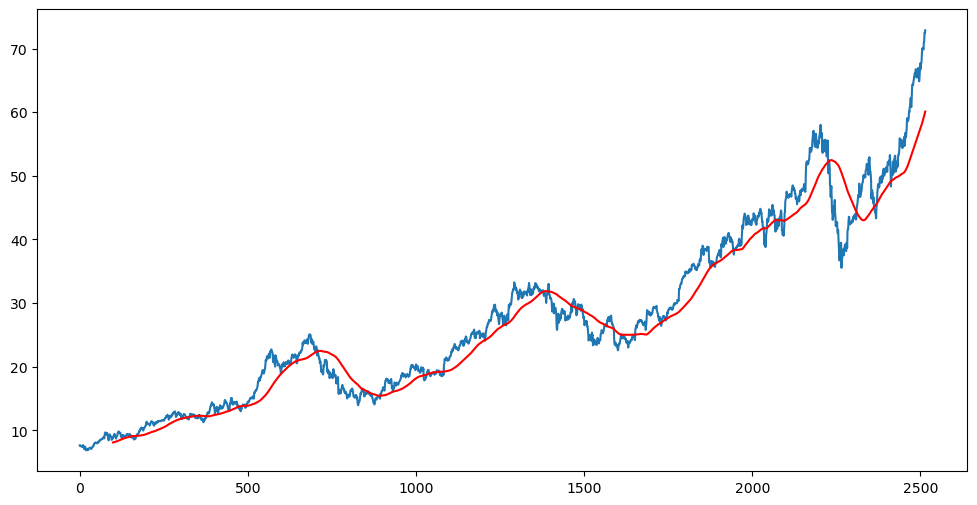

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

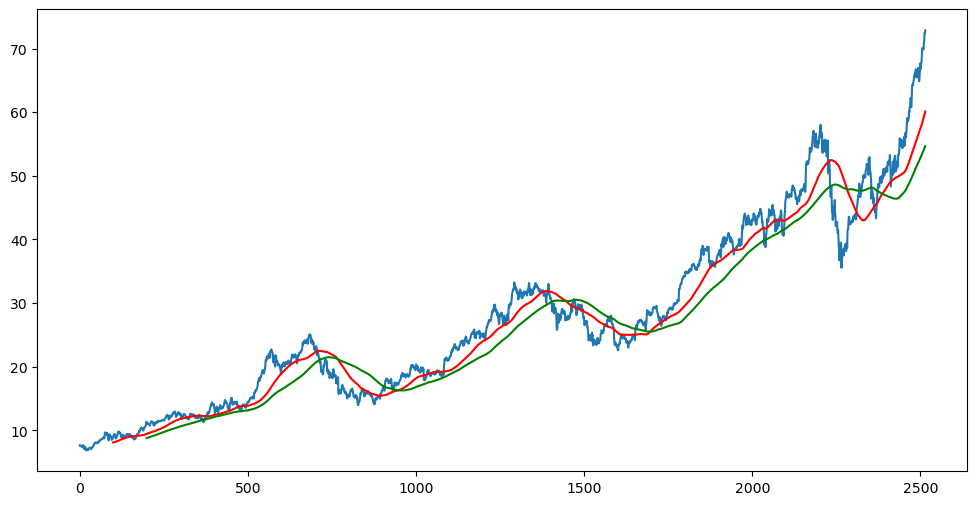

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2515, 5)

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2012, 1)
(503, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2012,42.307499
2013,43.064999
2014,43.057499
2015,43.257500
2016,43.750000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02105685],
       [0.02141165],
       [0.01814189],
       ...,
       [0.96073417],
       [0.96093553],
       [0.96415732]])

In [18]:
data_training_array.shape

(2012, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1912, 100, 1)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units=100, activation='tanh', input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
60/60 [==============================] - 12s 75ms/step - loss: 0.0117
Epoch 2/100
60/60 [==============================] - 4s 70ms/step - loss: 9.3838e-04
Epoch 3/100
60/60 [==============================] - 4s 70ms/step - loss: 7.8765e-04
Epoch 4/100
60/60 [==============================] - 4s 70ms/step - loss: 6.7004e-04
Epoch 5/100
60/60 [==============================] - 4s 64ms/step - loss: 6.4472e-04
Epoch 6/100
60/60 [==============================] - 4s 63ms/step - loss: 6.3129e-04
Epoch 7/100
60/60 [==============================] - 4s 64ms/step - loss: 5.4930e-04
Epoch 8/100
60/60 [==============================] - 4s 65ms/step - loss: 5.6527e-04
Epoch 9/100
60/60 [==============================] - 4s 62ms/step - loss: 4.7301e-04
Epoch 10/100
60/60 [==============================] - 4s 66ms/step - loss: 5.0645e-04
Epoch 11/100
60/60 [==============================] - 5s 80ms/step - loss: 5.6087e-04
Epoch 12/100
60/60 [==============================] - 5s 81ms/step

60/60 [==============================] - 4s 61ms/step - loss: 2.2362e-04
Epoch 97/100
60/60 [==============================] - 4s 64ms/step - loss: 2.2182e-04
Epoch 98/100
60/60 [==============================] - 4s 66ms/step - loss: 1.8675e-04
Epoch 99/100
60/60 [==============================] - 4s 65ms/step - loss: 1.9058e-04
Epoch 100/100
60/60 [==============================] - 4s 64ms/step - loss: 1.8424e-04


In [24]:
model.save('keras_model1.h5')

In [25]:
data_testing.head()

,Close
2012,42.307499
2013,43.064999
2014,43.057499
2015,43.257500
2016,43.750000


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\gkhus\AppData\Local\Temp\ipykernel_13564\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [28]:
final_df.head()

,Close
0,40.020000
1,40.264999
2,38.830002
3,39.369999
4,39.962502


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11980179],
       [0.12636441],
       [0.08792611],
       [0.10239064],
       [0.1182616 ],
       [0.12998062],
       [0.12562778],
       [0.10493538],
       [0.1025246 ],
       [0.10058264],
       [0.11779279],
       [0.11913209],
       [0.11437758],
       [0.11832853],
       [0.12911003],
       [0.13875312],
       [0.14169963],
       [0.14605236],
       [0.14638721],
       [0.13319495],
       [0.13205654],
       [0.1277037 ],
       [0.11009177],
       [0.12931092],
       [0.12502511],
       [0.11692221],
       [0.10774793],
       [0.11846249],
       [0.11035959],
       [0.11076137],
       [0.09294854],
       [0.07500166],
       [0.06495679],
       [0.0559834 ],
       [0.07332752],
       [0.08062676],
       [0.07426503],
       [0.07989013],
       [0.07781421],
       [0.08230091],
       [0.07560433],
       [0.08839482],
       [0.08779215],
       [0.09140826],
       [0.09181004],
       [0.09616287],
       [0.09247973],
       [0.099

In [30]:
input_data.shape

(603, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)


In [32]:
print(x_test.shape)
print(y_test.shape)

(503, 100, 1)
(503,)


In [33]:
y_predicted = model.predict(x_test)

16/16 [==============================] - 2s 40ms/step


In [34]:
y_predicted.shape

(503, 1)

In [35]:
y_test

array([0.18107544, 0.20136607, 0.20116518, 0.20652246, 0.21971473,
       0.21536199, 0.21522803, 0.21496011, 0.22158976, 0.23371055,
       0.22768367, 0.24717074, 0.24824212, 0.24288494, 0.23310789,
       0.2333757 , 0.21449141, 0.19366504, 0.19634363, 0.17257086,
       0.16594121, 0.16902158, 0.17136542, 0.12261434, 0.0957611 ,
       0.13955667, 0.11618558, 0.0867876 , 0.09522536, 0.13741382,
       0.14832918, 0.1686198 , 0.20625464, 0.20250447, 0.19862055,
       0.19339722, 0.20297328, 0.22306302, 0.24630015, 0.24241613,
       0.24060802, 0.21971473, 0.22781763, 0.23190255, 0.230898  ,
       0.21991562, 0.23270611, 0.25306366, 0.26471575, 0.25299673,
       0.24275098, 0.2441572 , 0.23993843, 0.22172372, 0.22132194,
       0.19473652, 0.17853081, 0.15234716, 0.20478139, 0.17511549,
       0.16265985, 0.17136542, 0.16399915, 0.17545034, 0.19701333,
       0.20498228, 0.17538341, 0.18656669, 0.20799572, 0.2025715 ,
       0.21395567, 0.21790662, 0.22520597, 0.24141168, 0.23873

In [36]:
y_predicted

array([[0.18735705],
       [0.1788392 ],
       [0.19175562],
       [0.1960888 ],
       [0.20132995],
       [0.21275449],
       [0.21274298],
       [0.21213734],
       [0.21147805],
       [0.21617909],
       [0.2268112 ],
       [0.22536369],
       [0.23932484],
       [0.24427983],
       [0.24119596],
       [0.23236284],
       [0.22968544],
       [0.21470033],
       [0.19444211],
       [0.19066356],
       [0.17244126],
       [0.1622844 ],
       [0.16226599],
       [0.16482309],
       [0.12947032],
       [0.09825331],
       [0.12205909],
       [0.11393183],
       [0.08952317],
       [0.08820073],
       [0.12029615],
       [0.13951908],
       [0.16031605],
       [0.19447309],
       [0.20128079],
       [0.19881223],
       [0.1929788 ],
       [0.19787003],
       [0.21454121],
       [0.23722509],
       [0.24066511],
       [0.23929808],
       [0.22230814],
       [0.22284713],
       [0.22644392],
       [0.22693749],
       [0.21869859],
       [0.225

In [37]:
y_predicted = scaler.inverse_transform(y_predicted)
y_test=y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

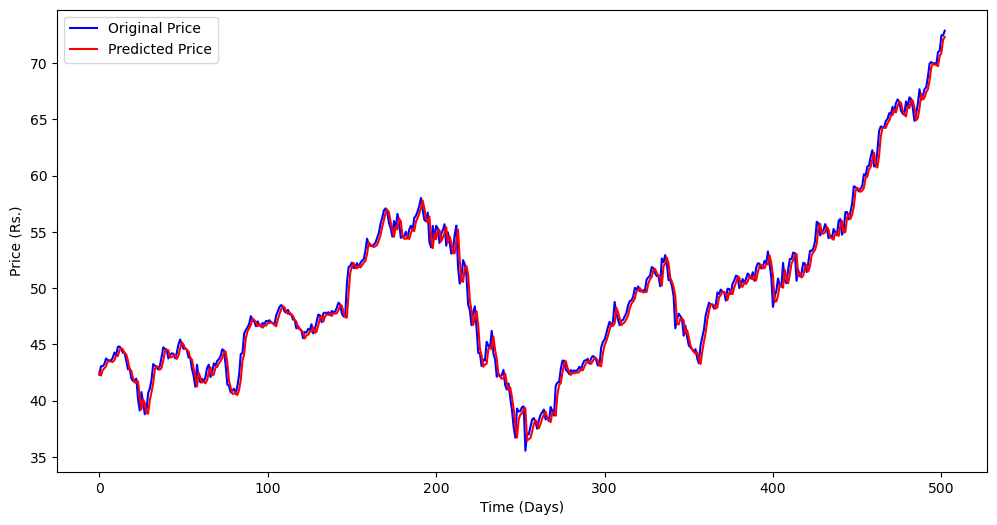

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time (Days)')
plt.ylabel('Price (Rs.)')
plt.legend()
plt.show()

In [39]:
RMSE=np.sqrt(np.square(np.subtract(y_test,y_predicted)).mean())
RMSE

0.8754738392795414

In [40]:
mape=np.mean(np.abs((y_test-y_predicted)/y_test))*100
mape

1.3453535127747702

In [41]:
m=y_test.mean()
m

49.606605408442896